# 数据分布

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option('display.float_format',lambda x : '%.2f' % x)
plt.rcParams['axes.unicode_minus'] = False
from scipy.stats import norm,geom,poisson,expon,binom
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data/500_Person_Gender_Height_Weight_Index.csv')

In [3]:
df.rename(columns={'Index':"Fat"},inplace=True)

# 0,1分布

二值随机

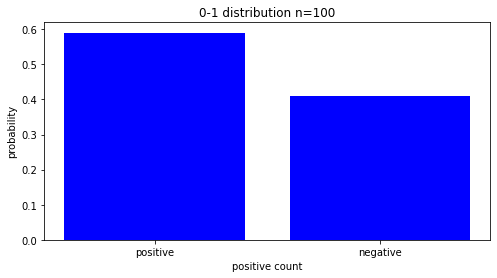

In [4]:
arr = np.random.binomial(1,0.5,100)
p0 = sum(arr==0)/len(arr)
p1 = sum(arr==1)/len(arr)
plt.figure(figsize=(8,4))
plt.xlabel('positive count')
plt.ylabel('probability')
plt.title('0-1 distribution n=' + str(len(arr)))
plt.bar(['positive','negative'],[p0,p1],color='b')
plt.show()

# 二项分布

n次抛硬币实验中有x次正面朝上的概率

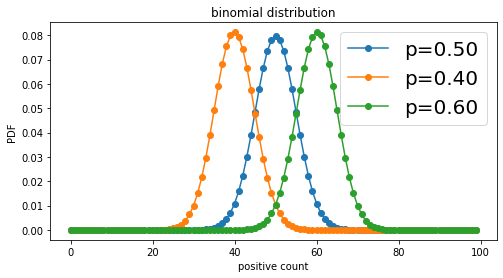

In [5]:
def show_binomial(x,n,p):
    arr = binom.pmf(x, n, p)
    li, = plt.plot(x, arr, marker='o',label='p=%.2f'%p)
    return li

n=100
x = np.arange(0, n) 
plt.figure(figsize=(8,4))

line1 = show_binomial(x,n,0.5)
line2 = show_binomial(x,n,0.4)
line3 = show_binomial(x,n,0.6)
plt.legend(handles=[line1,line2,line3],fontsize=20)

plt.xlabel('positive count')
plt.ylabel('PDF')
plt.title('binomial distribution')

plt.show()

# 几何分布：n次事件中，在第x次正面朝上的概率

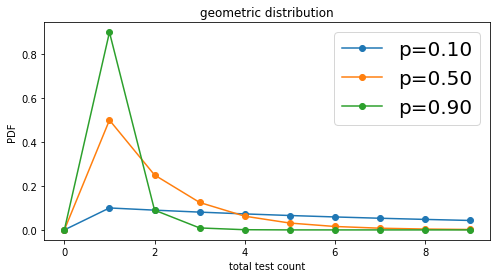

In [6]:
def show_plt_geom(x,p):
    arr = geom.pmf(x, p)
    li, = plt.plot(x, arr, marker='o', label='p=%.2f'%p)
    return li
n = 10
x = np.arange(0, n) 
plt.figure(figsize=(8,4))
line1 = show_plt_geom(x,0.1)
line2 = show_plt_geom(x,0.5)
line3 = show_plt_geom(x,0.9)
plt.legend(handles=[line1,line2,line3],fontsize=20)
plt.xlabel('total test count')
plt.ylabel('PDF')
plt.title("geometric distribution")
plt.show()

# 泊松分布:

单位时间内随机事件发生的次数的概率分布。泊松分布的参数λ是单位时间（或单位面积）内随机事件的平均发生率

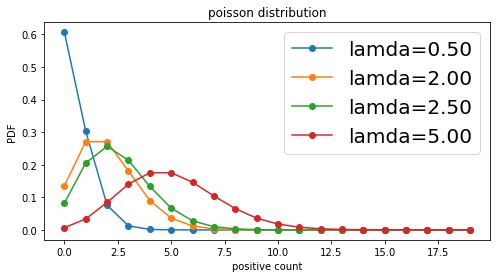

In [7]:
#一天内发生k次事件的概率是 (单位时间内事件发生的次数对应的概率)
def show_plt_poisson(x,lamda):
    arr = poisson.pmf(x, lamda)
    li, = plt.plot(x, arr, marker='o', label='lamda=%.2f'%lamda)
    return li

x = np.arange(0, 20, 1)

plt.figure(figsize=(8,4))
line0 = show_plt_poisson(x,0.5)
line1 = show_plt_poisson(x,2)
line2 = show_plt_poisson(x,2.5)
line3 = show_plt_poisson(x,5)
plt.legend(handles=[line0,line1,line2,line3],fontsize=20)

plt.xlabel('positive count')
plt.ylabel('PDF')
plt.title('poisson distribution')
plt.show()

# 正太分布

随机变量X服从一个位置参数为μ 、尺度参数为σ 的分布

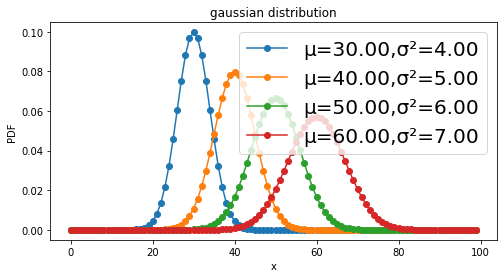

In [8]:
def show_plt_norm(x,mu, sigma):
    arr = norm.pdf(x, mu, sigma)
    li, = plt.plot(x, arr, marker='o', label='μ=%.2f,σ²=%.2f'%(mu,sigma))
    return li

x = np.arange(0, 100, 1)
plt.figure(figsize=(8,4))
line0 = show_plt_norm(x,30,4)
line1 = show_plt_norm(x,40,5)
line2 = show_plt_norm(x,50,6)
line3 = show_plt_norm(x,60,7)
plt.legend(handles=[line0,line1,line2,line3],fontsize=20)

plt.xlabel('x')
plt.ylabel('PDF')
plt.title('gaussian distribution')
plt.show()

# 指数分布

独立随机事件发生的时间间隔

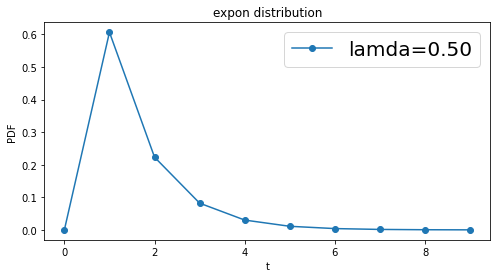

In [9]:
#指数分布中的lamda 是每日平均卖出的馒头数
def show_plt_expon(x,lamda):
    arr = expon.pdf(x,lamda) 
    li, = plt.plot(x, arr, marker='o', label='lamda=%.2f'%(lamda))
    return li

x = np.arange(0, 10, 1)
plt.figure(figsize=(8,4))
#line0 = show_plt_expon(x,0.1)
line1 = show_plt_expon(x,0.5)
#line2 = show_plt_expon(x,0.9)
plt.legend(handles=[line1],fontsize=20)

plt.xlabel('t')
plt.ylabel('PDF')
plt.title('expon distribution')
plt.show()

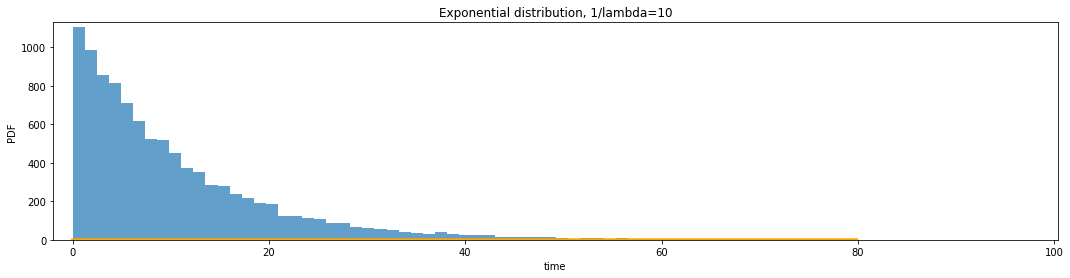

In [10]:
#指数分布-2
tau = 10
plt.figure(figsize=(18,4))
sample = np.random.exponential(tau, size=10000)  # 产生10000个满足指数分布的随机数
plt.hist(sample, bins=80, alpha=0.7) #绘制直方图
plt.margins(0.02) 

# 根据公式绘制指数分布的概率密度函数
lam = 1 / tau
x = np.arange(0,80,0.1)
y = lam * np.exp(- lam * x)
plt.plot(x,y,color='orange', lw=3)#设置标题和坐标轴
plt.title('Exponential distribution, 1/lambda=10')
plt.xlabel('time')
plt.ylabel('PDF')
plt.show()